In [45]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Dataset 
df = pd.read_csv('household_power_consumption.txt', delimiter= ';')

In [47]:
# Dataset Preview
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [48]:
# Number of rows and columns in dataset
df.shape

(2075259, 9)

In [49]:
# Checking for null values in the dataset
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [50]:
# Checking for duplicated rows in the dataset
df.duplicated().sum()

0

In [51]:
# Checking the datatype of each column
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [52]:
# Converting the `Date` column to datetime64 datatype (suitable format) 
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
# Converting all the numeric columns from object to float datatype  
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors= 'coerce')

In [54]:
# Ascertain that the datatype has changed in the selected columns
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [55]:
# Setting the `Date` column as the index in the Dataframe
df.set_index("Date", inplace= True)

In [56]:
# Dataset Preview after initial preprocessing
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [57]:
# Checking for missing values after initial preprocessing
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [58]:
# Using Forward-fill for imputation of missing values
df_clean = df.fillna(method='ffill')

# Checking for missing values after forward-fill technique
df_clean.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [59]:
# Resampling the preprocessed data to an hourly frequency and summating the values
df_hourly = df_clean.resample('H').sum()

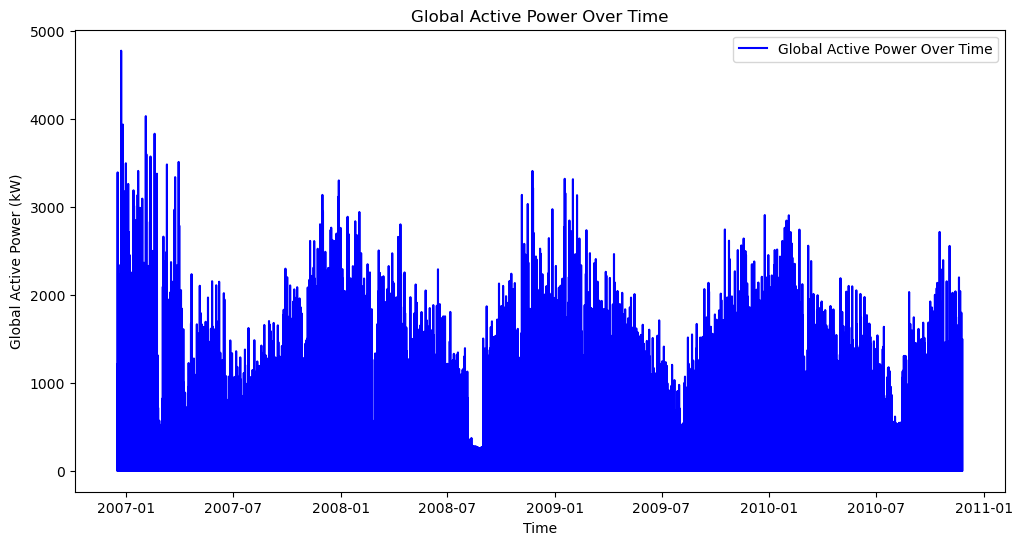

In [60]:
#Question11 - global_active_power over time
# Plotting global_active_power over time
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Global Active Power Over Time', color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

In [61]:
#Question 12
# Calculating the Pearson correlation coefficient between the global_active_power and voltage
correl_coeff1 = df_clean['Global_active_power'].corr(df_cleaned['Voltage'])
print(f"The pearson correlation coefficient between the global_active_power and voltage is : {correl_coeff1:.3f}")

The pearson correlation coefficient between the global_active_power and voltage is : -0.396


In [62]:
#Question 13
# Calculate the Pearson correlation coefficient between the voltage and global_intensity
correl_coeff2 = df_clean['Voltage'].corr(df_cleaned['Global_intensity'])
print(f" The pearson correlation coefficient between voltage and global_intensity is : {correl_coeff2:.2f}")

 The pearson correlation coefficient between voltage and global_intensity is : -0.41


In [63]:
# Downsampling the dataset to a daily basis
df_daily = df_clean.resample("D").sum()

In [64]:
# Resetting the dataframe index
df_daily.reset_index(inplace= True)

In [65]:
# Number of rows after the downsampling
df_daily.shape[0]

1442

In [66]:
# Splitting the dataset into the training and the test sets
train_split = df_daily.shape[0] - 300
train_set = df_daily[:train_split] 
test_set = df_daily[train_split:]  

In [67]:
# Number of samples in training and test sets
print(f"The training set has {train_set.shape[0]} samples")
print(f"The test set has {test_set.shape[0]} samples")

The training set has 1142 samples
The test set has 300 samples


In [68]:
#Facebook Prophet Model
from prophet import Prophet
train_set = train_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})
test_set = test_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})

model = Prophet()
model.fit(train_set[['ds', 'y']])
forecast = model.predict(test_set[['ds', 'y']])
forecast.head()

13:40:53 - cmdstanpy - INFO - Chain [1] start processing
13:40:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1521.504701,1893.779282,3007.401178,1521.504701,1521.504701,909.855943,909.855943,909.855943,210.637130,210.637130,210.637130,699.218813,699.218813,699.218813,0.0,0.0,0.0,2431.360643
1,2010-02-01,1521.452991,1509.749696,2580.073797,1521.452991,1521.452991,534.450386,534.450386,534.450386,-162.603217,-162.603217,-162.603217,697.053603,697.053603,697.053603,0.0,0.0,0.0,2055.903376
2,2010-02-02,1521.401281,1675.709051,2761.081828,1521.401281,1521.401281,670.960559,670.960559,670.960559,-19.429567,-19.429567,-19.429567,690.390126,690.390126,690.390126,0.0,0.0,0.0,2192.361840
3,2010-02-03,1521.349571,1654.417546,2759.161353,1521.349571,1521.349571,665.332488,665.332488,665.332488,-13.729379,-13.729379,-13.729379,679.061867,679.061867,679.061867,0.0,0.0,0.0,2186.682059
4,2010-02-04,1521.297861,1509.080168,2599.772444,1521.297861,1521.297861,484.446433,484.446433,484.446433,-178.553706,-178.553706,-178.553706,663.000140,663.000140,663.000140,0.0,0.0,0.0,2005.744294


In [69]:
# RMSE of the Univariate model
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

401.79340991814183

In [70]:
# MAPE of the Univariate model
mean_absolute_percentage_error(test_set['y'], forecast['yhat'])

0.2719598659784308

In [71]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,2431.360643,1893.779282,3007.401178,1521.504701,1521.504701,1521.504701
1,2010-02-01,2055.903376,1509.749696,2580.073797,1521.452991,1521.452991,1521.452991
2,2010-02-02,2192.361840,1675.709051,2761.081828,1521.401281,1521.401281,1521.401281
3,2010-02-03,2186.682059,1654.417546,2759.161353,1521.349571,1521.349571,1521.349571
4,2010-02-04,2005.744294,1509.080168,2599.772444,1521.297861,1521.297861,1521.297861
...,...,...,...,...,...,...,...
295,2010-11-22,1897.297952,1318.092562,2457.018251,1506.250270,1503.173620,1509.529920
296,2010-11-23,2046.509209,1463.203052,2588.201098,1506.198560,1503.107050,1509.491758
297,2010-11-24,2054.537251,1476.719465,2604.305726,1506.146850,1503.040479,1509.453087
298,2010-11-25,1888.567518,1371.443667,2455.138655,1506.095140,1502.974014,1509.413197


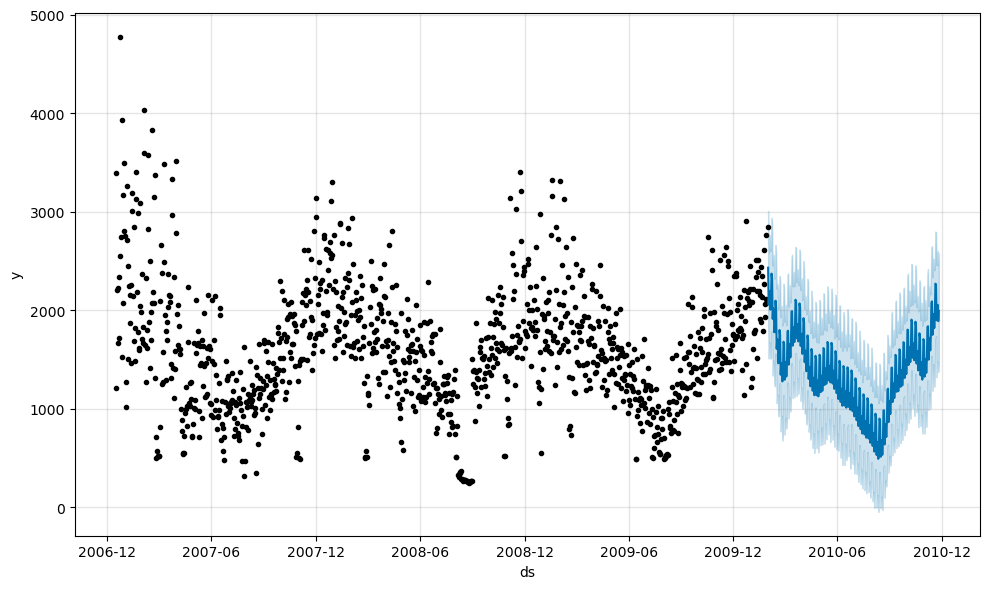

In [72]:
model.plot(forecast)
plt.show()

In [73]:
#Multivariate Modelling using Facebook Prophet Model
old_col = ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
new_col = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']

train_set = train_set.rename(columns= dict(zip(old_col, new_col)))
test_set = test_set.rename(columns= dict(zip(old_col, new_col)))

In [74]:
model = Prophet()

In [75]:
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [76]:
model.fit(train_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])
forecast = model.predict(test_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])

13:40:54 - cmdstanpy - INFO - Chain [1] start processing
13:40:55 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1616.302499,1794.362260,1825.743513,1616.302499,1616.302499,0.822642,0.822642,0.822642,1.194425,...,0.336845,0.336845,0.336845,8.839104,8.839104,8.839104,0.0,0.0,0.0,1809.433915
1,2010-02-01,1616.392095,1687.230796,1721.202728,1616.392095,1616.392095,9.383625,9.383625,9.383625,1.290846,...,-0.298040,-0.298040,-0.298040,9.359185,9.359185,9.359185,0.0,0.0,0.0,1704.729307
2,2010-02-02,1616.481690,2141.153485,2175.517917,1616.481690,1616.481690,8.214120,8.214120,8.214120,1.165040,...,-1.396603,-1.396603,-1.396603,9.904631,9.904631,9.904631,0.0,0.0,0.0,2158.091964
3,2010-02-03,1616.571286,2888.890001,2923.144964,1616.571286,1616.571286,-1.407917,-1.407917,-1.407917,0.767435,...,1.023491,1.023491,1.023491,10.467388,10.467388,10.467388,0.0,0.0,0.0,2905.663125
4,2010-02-04,1616.660881,2314.131134,2347.810297,1616.660881,1616.660881,6.257617,6.257617,6.257617,0.646528,...,-0.138636,-0.138636,-0.138636,11.039433,11.039433,11.039433,0.0,0.0,0.0,2330.511522


In [78]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,1809.433915,1794.362260,1825.743513,1616.302499,1616.302499,1616.302499
1,2010-02-01,1704.729307,1687.230796,1721.202728,1616.392095,1616.392095,1616.392095
2,2010-02-02,2158.091964,2141.153485,2175.517917,1616.481690,1616.481690,1616.481690
3,2010-02-03,2905.663125,2888.890001,2923.144964,1616.571286,1616.571286,1616.571286
4,2010-02-04,2330.511522,2314.131134,2347.810297,1616.660881,1616.660881,1616.660881
...,...,...,...,...,...,...,...
295,2010-11-22,2103.592220,1898.650291,2269.609362,1642.733200,1433.656014,1812.774319
296,2010-11-23,1644.618063,1431.287059,1819.870118,1642.822795,1432.552732,1813.306788
297,2010-11-24,1852.970394,1637.451325,2019.297464,1642.912391,1431.463274,1813.839258
298,2010-11-25,1474.524700,1260.002253,1648.952967,1643.001986,1430.451502,1814.444204


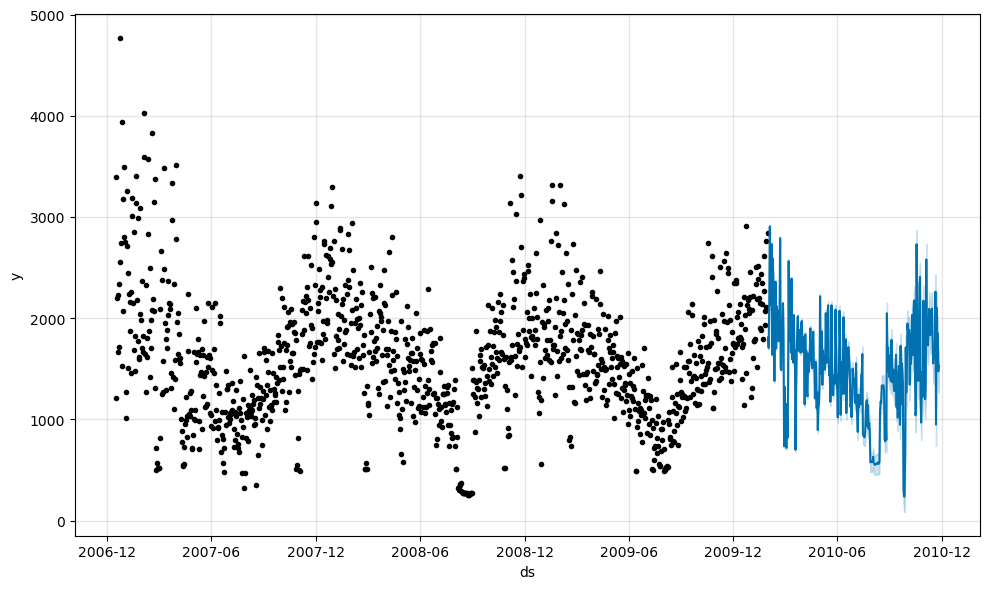

In [79]:
model.plot(forecast)
plt.show()

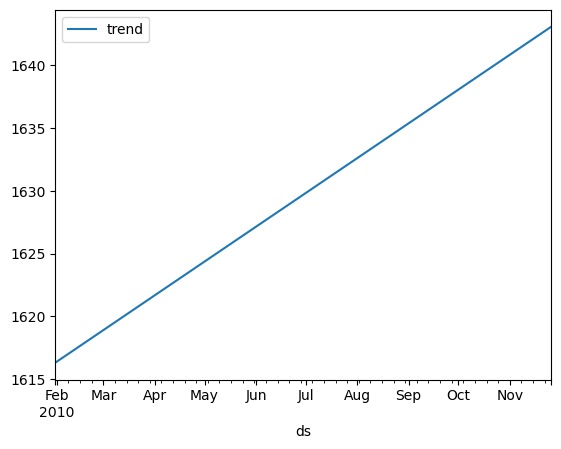

In [80]:
forecast.plot('ds', 'trend')
plt.show()

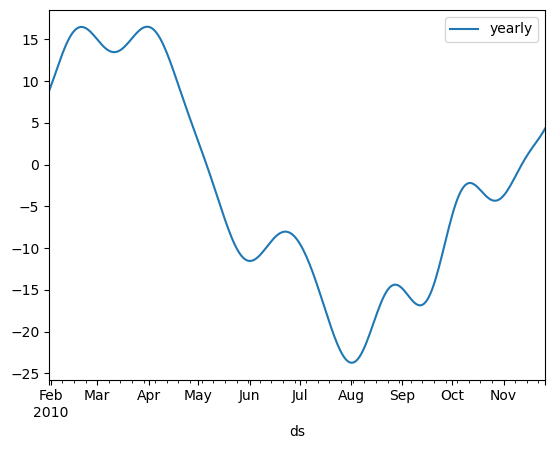

In [81]:
forecast.plot('ds', 'yearly')
plt.show()

In [82]:
# RMSE of the Multivariate Model
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

33.384901228493675

In [83]:
# MAPE of the Multivariate Model
mean_absolute_percentage_error(test_set['y'], forecast['yhat'])

0.024511197276909917